In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import numpy as np

In [9]:
df=pd.read_csv("Loan Prediction.csv")
df.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Handling Null values

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: title={'center': 'Gender'}>

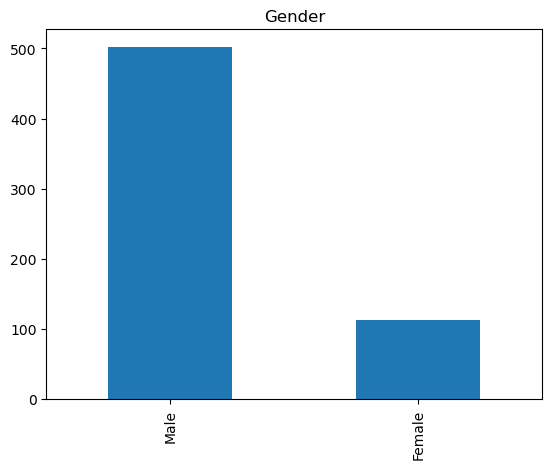

In [16]:

df['Gender'].value_counts().plot.bar( title= 'Gender')

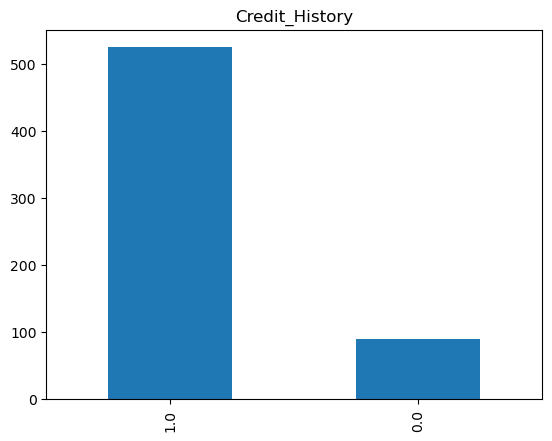

In [17]:
df['Credit_History'].value_counts().plot.bar(title= 'Credit_History') 
plt.show()

<Axes: title={'center': 'Property_Area'}>

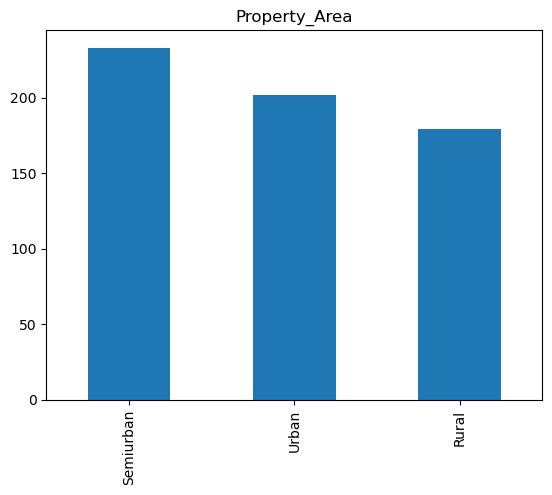

In [18]:
df['Property_Area'].value_counts().plot.bar(title= 'Property_Area')

In [20]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status']) 
Gender.div(Gender.sum(1).astype(int), axis=0).plot(kind="bar", figsize=(4,4))

<Axes: xlabel='Gender'>

In [125]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Handling String data types.

In [126]:
df=df.drop(["Loan_ID"],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [127]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Married"]=le.fit_transform(df["Married"])
df["Education"]=le.fit_transform(df["Education"])
df["Self_Employed"]=le.fit_transform(df["Self_Employed"])
df["Property_Area"]=le.fit_transform(df["Property_Area"])
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])
df["Dependents"]=le.fit_transform(df["Dependents"])


In [128]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [129]:
df["Property_Area"].unique()


array([2, 0, 1])

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


## Normalizing Data

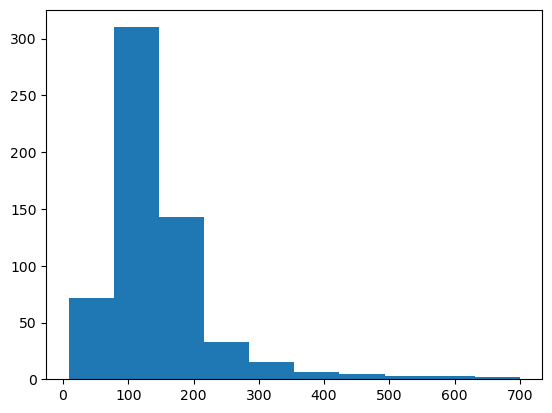

In [131]:
plt.hist(df["LoanAmount"])   # here histogram is right skewed so we need to normalize it.
plt.show()

In [132]:
df["LoanAmount"]=np.log(df["LoanAmount"]) #This transformation is used to address right-skewed distributions.

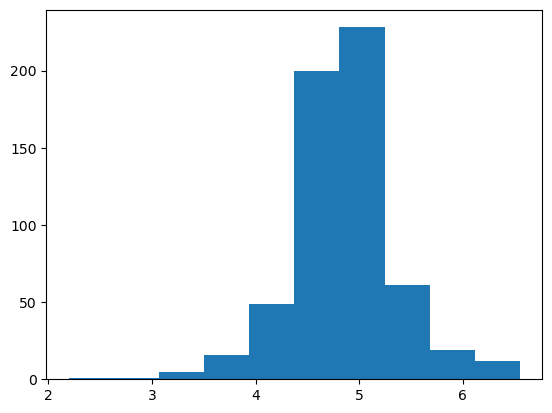

In [138]:
plt.hist(df["LoanAmount"])
plt.show()

In [148]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [149]:
from sklearn.preprocessing import StandardScaler 

Zscaler=StandardScaler()

df2=Zscaler.fit_transform(df)
df2=pd.DataFrame(df2,columns=df.columns)
df2.drop("Loan_Status",axis=1,inplace=True)
df2["Loan_status"]=df["Loan_Status"]
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,0.382616,-1.357847,-0.752060,-0.528362,-0.445039,0.072991,-0.554487,NaN,0.276642,0.432861,1.223298,1
1,0.382616,0.705812,0.141102,-0.528362,-0.445039,-0.134412,-0.038732,-0.010727,0.276642,0.432861,-1.318513,0
2,0.382616,0.705812,-0.752060,-0.528362,1.426564,-0.393747,-0.554487,-1.323101,0.276642,0.432861,1.223298,1
3,0.382616,0.705812,-0.752060,1.892641,-0.445039,-0.462062,0.251980,-0.138598,0.276642,0.432861,1.223298,1
4,0.382616,-1.357847,-0.752060,-0.528362,-0.445039,0.097728,-0.554487,0.180925,0.276642,0.432861,1.223298,1


## Splitting test and training data

In [167]:
df2.head(7)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,0.382616,-1.357847,-0.752060,-0.528362,-0.445039,0.072991,-0.554487,NaN,0.276642,0.432861,1.223298,1
1,0.382616,0.705812,0.141102,-0.528362,-0.445039,-0.134412,-0.038732,-0.010727,0.276642,0.432861,-1.318513,0
2,0.382616,0.705812,-0.752060,-0.528362,1.426564,-0.393747,-0.554487,-1.323101,0.276642,0.432861,1.223298,1
3,0.382616,0.705812,-0.752060,1.892641,-0.445039,-0.462062,0.251980,-0.138598,0.276642,0.432861,1.223298,1
4,0.382616,-1.357847,-0.752060,-0.528362,-0.445039,0.097728,-0.554487,0.180925,0.276642,0.432861,1.223298,1
5,0.382616,0.705812,1.034264,-0.528362,1.426564,0.002218,0.880600,1.445973,0.276642,0.432861,1.223298,1
6,0.382616,0.705812,-0.752060,1.892641,-0.445039,-0.503019,-0.035995,-0.601462,0.276642,0.432861,1.223298,1


In [6]:
x=df2.drop("Loan_status",axis=1)
y=df2["Loan_status"]

NameError: name 'df2' is not defined

In [169]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
x_train.shape

NameError: name 'x_train' is not defined

In [171]:
x_test.shape

(123, 11)

In [172]:
y_train.shape

(491,)

In [173]:
y_test.shape

(123,)

## Model implementation

In [175]:
from sklearn.tree import DecisionTreeClassifier

DTC=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [164]:
y_pred=DTC.predict(x_test)

## Accuracy

In [160]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

77.23577235772358

### Confusion matrix

In [179]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm=confusion_matrix(y_test, y_pred)
print(cm)

[[20 13]
 [15 75]]


## Errors

In [180]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.22764227642276422
MSE: 0.22764227642276422
RMSE: 0.4771187236136979


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix is..")
cm=confusion_matrix(y_test, y_pred)
print(cm)


NameError: name 'x_train' is not defined